# YOLO for multiple object detection

### Imports and Installs for Yolo and OpenCV

In [60]:
! pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [61]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import files

In [62]:
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg

--2022-07-30 09:03:21--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: ‘yolov3.cfg.1’

yolov3.cfg.1        100%[===================>]   8.15K  --.-KB/s    in 0s      

2022-07-30 09:03:21 (72.8 MB/s) - ‘yolov3.cfg.1’ saved [8342/8342]



In [63]:
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names

--2022-07-30 09:03:21--  https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 625 [text/plain]
Saving to: ‘coco.names.1’

coco.names.1        100%[===================>]     625  --.-KB/s    in 0s      

2022-07-30 09:03:21 (29.8 MB/s) - ‘coco.names.1’ saved [625/625]



In [64]:
!wget https://pjreddie.com/media/files/yolov3.weights


--2022-07-30 09:03:21--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights.1’

yolov3.weights.1    100%[===================>] 236.52M  70.1MB/s    in 3.6s    

2022-07-30 09:03:25 (65.1 MB/s) - ‘yolov3.weights.1’ saved [248007048/248007048]



### Setting up YOLO net from CV2 with weights and configuration file.

In [65]:
net = cv2.dnn.readNet('yolov3.weights', 'yolov3.cfg')

In [66]:
with open('coco.names', 'r') as f:
  classes = f.read().splitlines()

### Image Pre-processing

In [67]:
uploaded = files.upload()
filename = next(iter(uploaded))
img = cv2.imread(filename)
height, width, _ = img.shape

# normalization of image 

blob = cv2.dnn.blobFromImage(img, 1/255, (416, 416), (0,0,0), swapRB = True, crop = False)

Saving img_1.jpeg to img_1 (1).jpeg


In [68]:
from google.colab.patches import cv2_imshow

In [69]:
# for b in blob:
#   for n, img_blob in enumerate(b):
#     print(str(n))
#     cv2_imshow(img_blob)

In [70]:
net.setInput(blob)

output_layers_names = net.getUnconnectedOutLayersNames()
layer_outputs = net.forward(output_layers_names)

In [71]:
# extract the bounding boxes, confidences and predicted classes saved in different lists

boxes = []
confidences = []
class_ids = []

for output in layer_outputs:
  for detection in output:
    scores = detection[5:]
    class_id = np.argmax(scores)
    confidence = scores[class_id]

    if confidence > 0.5:
      centre_x = int(detection[0]* width) 
      centre_y = int(detection[1]* height)
      w = int(detection[2]*width)
      h = int(detection[3]*height) 

      x = int(centre_x - w/2)
      y = int(centre_y - h/2)

      boxes.append([x, y, w, h])
      confidences.append(float(confidence))
      class_ids.append(class_id)

In [72]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
# print(indexes.flatten())

In [73]:
# save the objects as dictionary of objects names to list of dimensions

In [74]:
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0, 255, size = (len(boxes), 3))
objects = []

# need to keep track of the detected objects with their dimensions
j=0
tracker = {}

for i in indexes.flatten():
  j+=1
  x, y, w, h = boxes[i]
  label = str(classes[class_ids[i]])

  objects.append(label)
  tracker[f'{label}_{j}'] = boxes[i]
  confidence = str(round(confidences[i],2))
  color = colors[i]
  sp = (x, y)
  ep = (x+w, y+h)
  cv2.rectangle(img, sp, ep, color, 2)
  cv2.putText(img, label + " " + confidence, (x, y+20), font, 2, (255,255,255), 2)

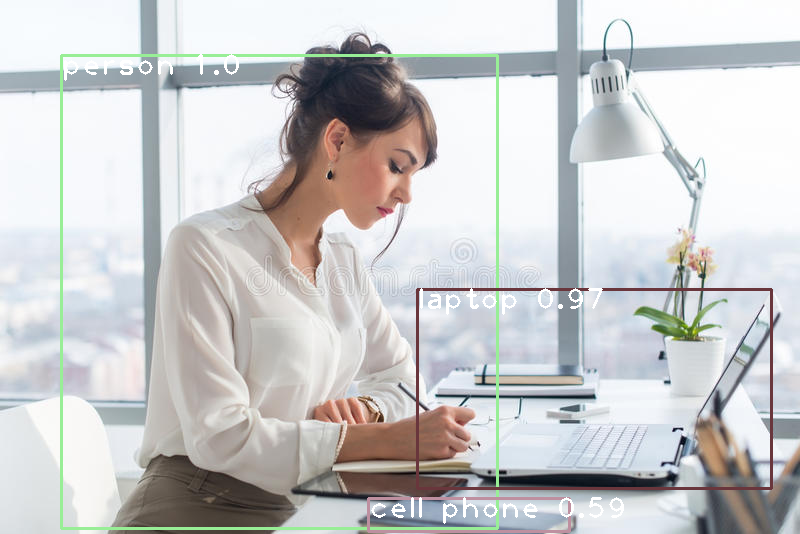

In [76]:
cv2_imshow(img)

In [77]:
list_a = []
for i in tracker.keys():
  list_a.append(i)

### Which object will you select?

Your detected Object List are:

In [78]:
list_a

['person_1', 'laptop_2', 'cell phone_3']

In [80]:
obj = input("Please Type the object name: ") 
print(obj) 

Please Type the object name: person_1
person_1


### Blur Section

In [81]:
# save the co-ordinates from the dictionary of the object
start_x, start_y, end_x, end_y = tracker[obj]

In [82]:
kernel_width = (width//2) | 1
kernel_height = (height//2) | 1

In [83]:
try:
  face = img[start_y: end_y, start_x: end_x]
  face = cv2.GaussianBlur(face, (kernel_width, kernel_height), 0)
except:
  print("The image couldn't be processed or objects couldn't be identified")

In [84]:
img[start_y: end_y, start_x: end_x] = face
cv2.imwrite('blurred-face_1.jpg', img)

True